In [1]:
import matplotlib.pyplot as plt
import rebound
import numpy as np
%matplotlib inline
plt.style.use('paper')

In [2]:
def setup(j, k, mu=3e-6, etilde=0.3, t0=-1, pomega=np.pi/2, phi=2*np.pi/3, deltan=0): # make sim with sim.t = t0 (where conjunction always happens near t=0, use get_conjunction_time to get exact)
    n = 2*np.pi
    n20 = n*(j-k)/j
    ec = 2*k/3/j
    e = etilde*ec
     
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1)
    sim.add(m=mu, P=1, 
            l=pomega+phi+n*t0) # phi = l - pomega, so l = pomega+phi
    ps = sim.particles
    theta = pomega+phi+n20*t0
    sim.add(P=2*np.pi/(n20+deltan), e=etilde*ec, pomega=pomega, l=theta)
    sim.t = t0
    
    print(theta)
    return sim

In [3]:
j, k = 21, 1
ec = 2/3*k/j
tconj = j/k
dares = (j/(j-k))**(2/3)-1
tmin = -0.1*tconj
tmax = 0.1*tconj
sim = setup(j=j, k=k, mu=0, t0=tmin)
ps = sim.particles

Nout = 1000
x, y = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(tmin, tmax, Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    x[i] = ps[2].d - ps[1].d
    y[i] = np.arcsin((ps[1].x*ps[2].y - ps[1].y*ps[2].x)/ps[1].d/ps[2].d)

n=2*np.pi
delta_lambda = ec # deltan0*deltat, i.e. difference in lambda to position inner at l=0, and outer at l=delta_lambda
xpred = ec - ps[2].e*np.cos(n*times - ps[2].pomega)
ypred = (ps[2].n-ps[1].n)*times + 2*ps[2].e*np.sin(n*times - ps[2].pomega) + delta_lambda

j, k = 51, 1
ec2 = 2/3*k/j
tconj = j/k
dares2 = (j/(j-k))**(2/3)-1
tmin = -0.1*tconj
tmax = 0.1*tconj
sim = setup(j=j, k=k, mu=0, t0=tmin)
ps = sim.particles

Nout = 1000
x2, y2 = np.zeros(Nout), np.zeros(Nout)
times2 = np.linspace(tmin, tmax, Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    x2[i] = ps[2].d - ps[1].d
    y2[i] = np.arcsin((ps[1].x*ps[2].y - ps[1].y*ps[2].x)/ps[1].d/ps[2].d)

j, k = 201, 1
ec3 = 2/3*k/j
tconj = j/k
dares3 = (j/(j-k))**(2/3)-1
tmin = -0.1*tconj
tmax = 0.1*tconj
sim = setup(j=j, k=k, mu=0, t0=tmin)
ps = sim.particles

Nout = 1000
x3, y3 = np.zeros(Nout), np.zeros(Nout)
times3 = np.linspace(tmin, tmax, Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    x3[i] = ps[2].d - ps[1].d
    y3[i] = np.arcsin((ps[1].x*ps[2].y - ps[1].y*ps[2].x)/ps[1].d/ps[2].d)

-8.901179185171081
-27.750735106709843
-121.99851471440364


/var/folders/j6/k5h33tfx6599wz0zxqfyncm80000gp/T/ipykernel_11711/469661536.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels([f'{(round(xconv(yval), 1))}' for yval in ax.get_yticks()])


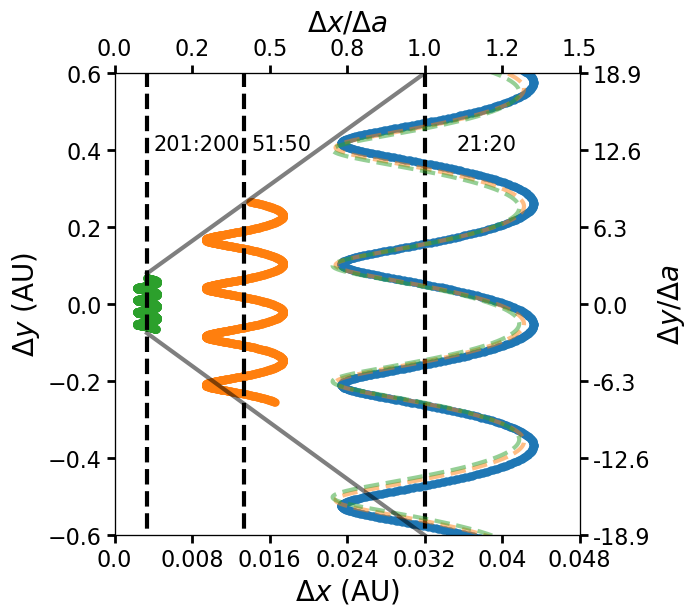

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y, '.', color='tab:blue')
ax.plot((ec, ec), (-1.9, 1.9), color='k', linestyle='--', rasterized=True)

#ax.plot(xpred, ypred, '.')

ax.plot(x2, y2, '.', color='tab:orange')
ax.plot(x2*(ec/ec2), y2*(ec/ec2), color='tab:orange', linestyle='--', alpha=0.5)
ax.plot((dares2, dares2), (-1.9, 1.9), color='k', linestyle='--', rasterized=True)

ax.plot(x3, y3, '.', color='tab:green')
ax.plot(x3*(ec/ec3), y3*(ec/ec3), color='tab:green', linestyle='--', alpha=0.5)
ax.plot((dares3, dares3), (-1.9, 1.9), color='k', linestyle='--', rasterized=True)

ax.set_xlim([0, 1.5*ec])
ax.set_ylim([-.6, 0.6])
ax.text(0.004, 0.4, '201:200', fontsize=15)
ax.text(0.014, 0.4, '51:50', fontsize=15)
ax.text(0.035, 0.4, '21:20', fontsize=15)

ax.set_xlabel(r'$\Delta x$ (AU)')
ax.set_ylabel(r'$\Delta y$ (AU)')

def xconv(x): #ATMOSPHERE ACCRETION
    return x/ec

ax.set_xticks(ec*np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]))
ax.set_xticklabels([f'{(round(xval, 3))}' for xval in ax.get_xticks()])
ax2 = ax.twiny()
ax2.set_xlabel(r'$\Delta x/\Delta a$' )
ax2.set_xlim(ax.get_xlim())

ax2.set_xticks(np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]))
ax2.set_xticklabels([f'{(round(xconv(xval), 1))}' for xval in ax.get_xticks()])

ax3 = ax.twinx()
ax3.set_ylabel(r'$\Delta y/\Delta a$' )
ax3.set_ylim(ax.get_ylim())

#ax3.set_yticks(np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]))
ax3.set_yticklabels([f'{(round(xconv(yval), 1))}' for yval in ax.get_yticks()])

ax.plot((ec3, ec), (0.08, 0.6), 'k-', alpha=0.5)
ax.plot((ec3, ec), (-0.075, -0.6), 'k-', alpha=0.5)
fig.savefig('selfsimilar.pdf', bbox_inches='tight')